# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

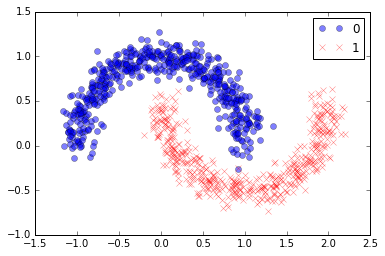

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise=0.1, random_state = 0)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


### Shallow Model

In [7]:
model = Sequential()
model.add(Dense(1, 
                input_shape=(2,), 
                activation='sigmoid'))
model.compile(Adam(lr = 0.05), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs = 200, verbose=0)

In [9]:
results = model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

In [10]:
results

[0.31613724688688916, 0.84333333412806188]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.843


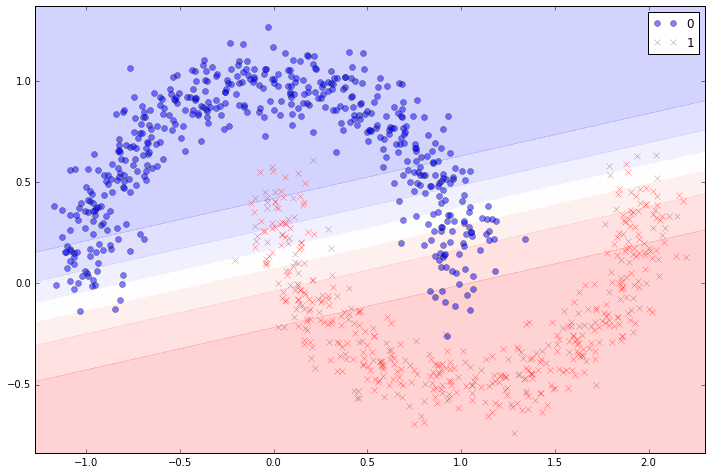

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis = 0) - 0.1
    amax, bmax = X.max(axis = 0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize = (12, 8))
    plt.contourf(aa, bb, cc, cmap = 'bwr', alpha = 0.2)
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [13]:
model = Sequential()
model.add(Dense(4, 
                input_shape=(2,), 
                activation = 'tanh'))
model.add(Dense(2, 
                activation = 'tanh'))
model.add(Dense(1, 
                activation='sigmoid'))
model.compile(Adam(lr = 0.05), 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

[0.0023767850548028946, 1.0]

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

 32/300 [==>...........................] - ETA: 0sThe Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


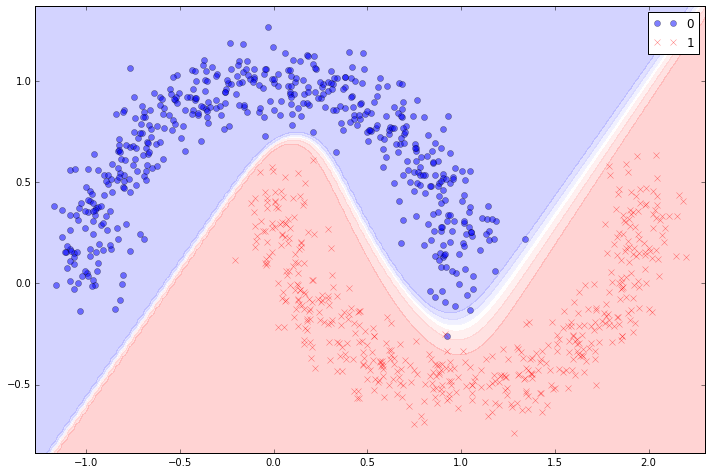

In [18]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [19]:
df = pd.read_csv('./data/iris.csv')

/home/arcyfelix/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


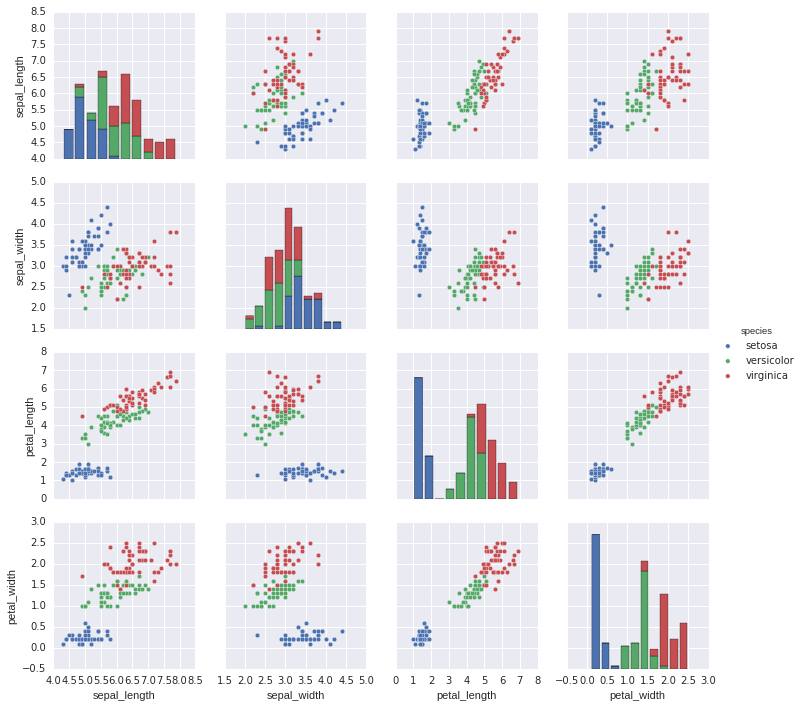

In [20]:
import notebook
import seaborn as sns
sns.pairplot(df, 
             hue = "species")

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
X = df.drop('species', axis = 1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [24]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [25]:
y = df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [26]:
from keras.utils.np_utils import to_categorical

In [27]:
y_cat = to_categorical(y)

In [28]:
y_cat[:10]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X.values, 
                                                    y_cat,
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [30]:
model = Sequential()
model.add(Dense(3, 
                input_shape = (4,), 
                activation = 'softmax'))
model.compile(Adam(lr = 0.1),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [31]:
model.fit(X_train, 
          y_train, 
          epochs = 20, 
          validation_split = 0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s - loss: 0.9767 - acc: 0.7037 - val_loss: 0.7476 - val_acc: 0.5833
Epoch 2/20
108/108 [==============================] - 0s - loss: 0.6648 - acc: 0.6667 - val_loss: 0.8067 - val_acc: 0.5833
Epoch 3/20
108/108 [==============================] - 0s - loss: 0.5620 - acc: 0.7037 - val_loss: 0.7076 - val_acc: 0.5833
Epoch 4/20
108/108 [==============================] - 0s - loss: 0.5162 - acc: 0.6852 - val_loss: 0.5581 - val_acc: 0.5833
Epoch 5/20
108/108 [==============================] - 0s - loss: 0.4175 - acc: 0.7593 - val_loss: 0.5114 - val_acc: 0.9167
Epoch 6/20
108/108 [==============================] - 0s - loss: 0.4116 - acc: 0.8148 - val_loss: 0.4839 

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred[:5]

array([[  3.25250672e-03,   6.03683591e-01,   3.93063873e-01],
       [  9.93527591e-01,   6.46749511e-03,   4.85106739e-06],
       [  1.03202616e-07,   1.51174664e-02,   9.84882414e-01],
       [  3.78669961e-03,   5.20649433e-01,   4.75563884e-01],
       [  2.11044005e-03,   5.44582248e-01,   4.53307271e-01]], dtype=float32)

In [34]:
y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.89      0.94         9
          2       0.92      1.00      0.96        11

avg / total       0.97      0.97      0.97        30



In [37]:
confusion_matrix(y_test_class, y_pred_class)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [38]:
ex1 = pd.read_csv('./data/diabetes.csv')

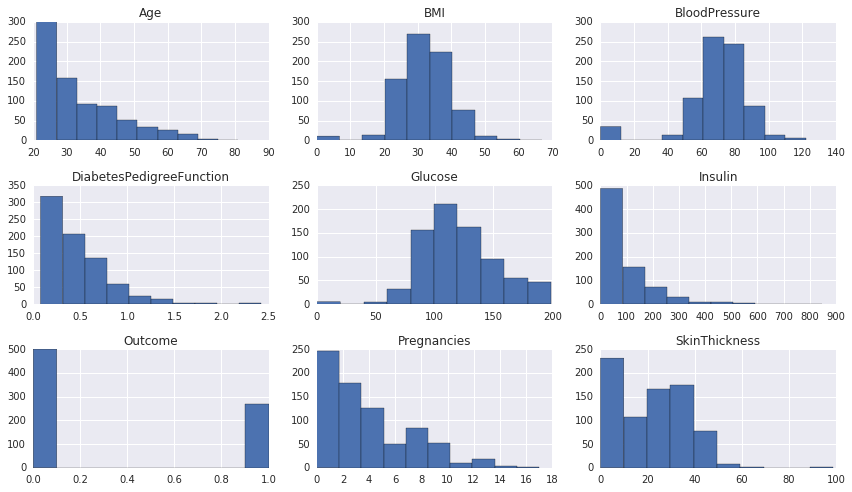

In [39]:
ex1.hist(figsize = (12, 7))
plt.tight_layout()

In [40]:
import seaborn as sns

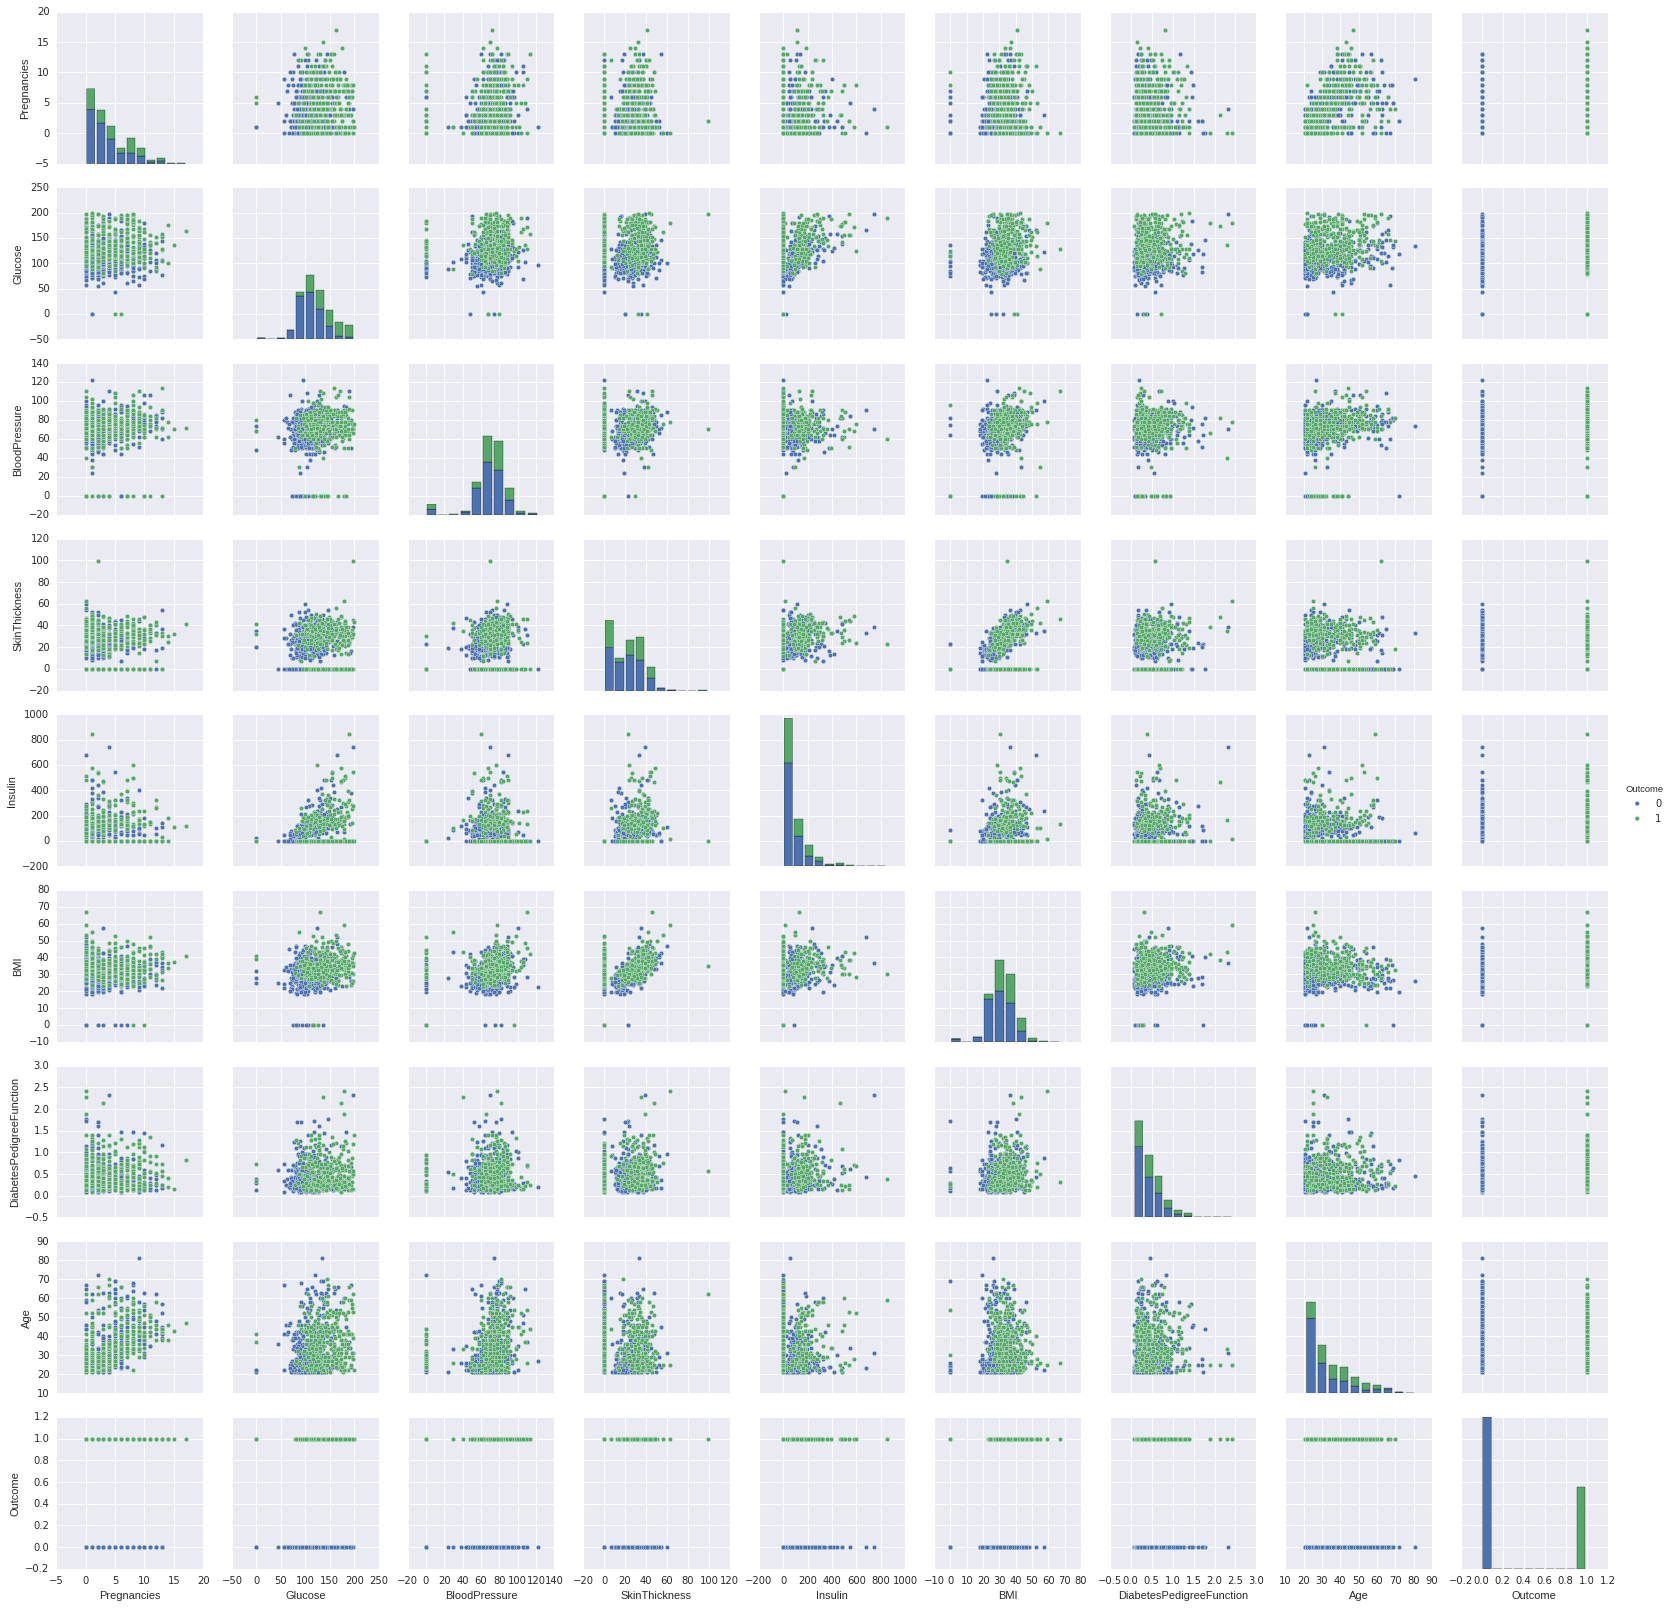

In [41]:
sns.pairplot(ex1, 
             hue = "Outcome")

In [42]:
ex1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [43]:
ex1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
minmax = MinMaxScaler()

In [46]:
X = ex1.drop('Outcome', axis = 1)

In [47]:
Y = ex1['Outcome']

In [48]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [49]:
X = pd.DataFrame(minmax.fit_transform(X), 
                 columns = ['Pregnancies', 'Glucose', 'BloodPressure', 
                            'SkinThickness','Insulin', 'BMI', 
                            'DiabetesPedigreeFunction', 'Age'])

In [50]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [51]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [52]:
X = X.values
Y = Y.values

In [53]:
from keras.utils import to_categorical

In [54]:
Y_cat = to_categorical(Y)

In [55]:
Y_cat

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y_cat, 
                                                    test_size = 0.2, 
                                                    random_state = 22)

In [58]:
X_train.shape

(614, 8)

In [59]:
X_test.shape

(154, 8)

In [60]:
Y_train.shape

(614, 2)

In [61]:
Y_test.shape

(154, 2)

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [63]:
model = Sequential()
model.add(Dense(units = 64, 
                input_shape = (8, ), 
                activation = 'tanh'))
model.add(Dense(units = 32, 
                activation = 'tanh'))
model.add(Dense(units = 2, 
                activation = 'softmax'))

model.compile(optimizer = Adam(lr = 0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [64]:
model.fit(X_train, 
          Y_train, 
          validation_split = 0.1, 
          epochs = 50, 
          verbose = 2)

Train on 552 samples, validate on 62 samples
Epoch 1/50
0s - loss: 0.6225 - acc: 0.6649 - val_loss: 0.5827 - val_acc: 0.7258
Epoch 2/50
0s - loss: 0.5543 - acc: 0.7210 - val_loss: 0.5359 - val_acc: 0.7097
Epoch 3/50
0s - loss: 0.5223 - acc: 0.7518 - val_loss: 0.6674 - val_acc: 0.6613
Epoch 4/50
0s - loss: 0.5390 - acc: 0.7283 - val_loss: 0.5103 - val_acc: 0.7097
Epoch 5/50
0s - loss: 0.4865 - acc: 0.7591 - val_loss: 0.4766 - val_acc: 0.7419
Epoch 6/50
0s - loss: 0.5093 - acc: 0.7591 - val_loss: 0.5236 - val_acc: 0.7581
Epoch 7/50
0s - loss: 0.4987 - acc: 0.7609 - val_loss: 0.4880 - val_acc: 0.7742
Epoch 8/50
0s - loss: 0.5215 - acc: 0.7301 - val_loss: 0.5358 - val_acc: 0.7419
Epoch 9/50
0s - loss: 0.4929 - acc: 0.7572 - val_loss: 0.4982 - val_acc: 0.7258
Epoch 10/50
0s - loss: 0.4764 - acc: 0.7826 - val_loss: 0.4947 - val_acc: 0.7581
Epoch 11/50
0s - loss: 0.4719 - acc: 0.7736 - val_loss: 0.5174 - val_acc: 0.7742
Epoch 12/50
0s - loss: 0.4766 - acc: 0.7808 - val_loss: 0.5069 - val_acc:

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
Y_pred = model.predict(X_test)

In [67]:
Y_pred

array([[ 0.69321513,  0.30678487],
       [ 0.96971548,  0.03028453],
       [ 0.60026515,  0.39973488],
       [ 0.71022725,  0.28977269],
       [ 0.95935559,  0.0406444 ],
       [ 0.83953601,  0.16046396],
       [ 0.91710025,  0.08289977],
       [ 0.90058094,  0.0994191 ],
       [ 0.8986693 ,  0.1013307 ],
       [ 0.98115957,  0.01884041],
       [ 0.93336481,  0.06663517],
       [ 0.77059811,  0.22940189],
       [ 0.96629304,  0.03370703],
       [ 0.36887372,  0.63112622],
       [ 0.95320195,  0.04679808],
       [ 0.82475483,  0.17524509],
       [ 0.97457594,  0.02542408],
       [ 0.73955768,  0.26044238],
       [ 0.64015061,  0.35984933],
       [ 0.84146076,  0.15853928],
       [ 0.90808642,  0.0919136 ],
       [ 0.89343238,  0.10656761],
       [ 0.48478565,  0.51521438],
       [ 0.27667168,  0.72332835],
       [ 0.95334917,  0.04665087],
       [ 0.60332954,  0.39667046],
       [ 0.9758839 ,  0.02411616],
       [ 0.94482136,  0.05517857],
       [ 0.90599465,

In [68]:
Y_pred = np.argmax(Y_pred, axis = 1)
Y_test = np.argmax(Y_test, axis = 1)

In [69]:
pd.Series(Y_test).value_counts() / len(Y_test)

0    0.649351
1    0.350649
dtype: float64

In [70]:
pd.Series(Y_pred).value_counts() / len(Y_test)

0    0.909091
1    0.090909
dtype: float64

In [71]:
accuracy_score(Y_test, Y_pred)

0.70129870129870131

In [72]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.69      0.97      0.81       100
          1       0.79      0.20      0.32        54

avg / total       0.73      0.70      0.64       154



In [73]:
confusion_matrix(Y_test, Y_pred)

array([[97,  3],
       [43, 11]])

## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

### Training a Support Vector Machine Classifier and a Random Forest Classifier

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 22)

In [75]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [76]:
models = [SVC(), RandomForestClassifier()]
for model in models:
    model.fit(X_train, Y_train)
    print('*' * 50)
    print(model)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print('Accuracy: {:0.3f}'.format(accuracy))
    print('Confusion matrix: \n', confusion_matrix(Y_test, Y_pred))

**************************************************
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy: 0.734
Confusion matrix: 
 [[96  4]
 [37 17]]
**************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy: 0.695
Confusion matrix: 
 [[91  9]
 [38 16]]


### Restricting to only 4 most important features

In [77]:
ex1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
outcome_corr = ex1.corr()['Outcome']
outcome_corr

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [79]:
outcome_corr_sorted = outcome_corr.sort_values(ascending = False)
outcome_corr_sorted

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

#### Thus, 4 most important features are:
 - Glucose
 - BMI
 - Age
 - Pregnancies

In [80]:
outcome_corr_sorted.index[0]

'Outcome'

In [81]:
chosen_features = outcome_corr_sorted.index[1:5]
chosen_features

Index(['Glucose', 'BMI', 'Age', 'Pregnancies'], dtype='object')

In [82]:
X = ex1[chosen_features]
X = minmax.fit_transform(X)

In [83]:
pd.DataFrame(X, columns = chosen_features).head()

,Glucose,BMI,Age,Pregnancies
0,0.743719,0.500745,0.483333,0.352941
1,0.427136,0.396423,0.166667,0.058824
2,0.919598,0.347243,0.183333,0.470588
3,0.447236,0.418778,0.000000,0.058824
4,0.688442,0.642325,0.200000,0.000000


In [84]:
Y = ex1['Outcome']

In [85]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 22)

In [87]:
models = [SVC(), RandomForestClassifier()]
for model in models:
    model.fit(X_train, Y_train)
    print('*' * 100)
    print(model)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print('Accuracy: {:0.3f}'.format(accuracy))
    print('Confusion matrix: \n', confusion_matrix(Y_test, Y_pred))

****************************************************************************************************
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy: 0.747
Confusion matrix: 
 [[92  8]
 [31 23]]
****************************************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy: 0.727
Confusion matrix: 
 [[90 10]
 [32 22]]


#### The SVM performes slightly better, however Random Forest Classifier is slightly worse... Hmm...